<img src="Logo_P5.PNG" height="200" width="200" >
<h1 style="color:blue; text-align:center; background-color:AliceBlue; font-size:400%; font-family:verdana; border:2px solid DodgerBlue"><br>OPTIMISATION<br>DE LA GESTION DES DONNEES<br>
<h5 style="color:black; text-align:right">NGUYEN Huynh Thanh Qui<br>08 août 2020<br></h5>
</h1>

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:verdana; border:2px solid LightSteelBlue"><br>Etude de données<br></h1>

In [1]:
# Importer les bibliothèques de Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Lecture des données
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

C:\Users\nguye\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
%whos

Variable   Type         Data/Info
---------------------------------
erp        DataFrame         product_id  onsale_w<...>n\n[825 rows x 5 columns]
liaison    DataFrame         product_id   id_web\<...>n\n[825 rows x 2 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
web        DataFrame                          sku<...>n[1513 rows x 28 columns]


<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"><br>Fichier web<br></h2>

In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

<p style="text-align:center"><br><b>Observation<br></b>
  <ul>
      <li> La colonne "sku" contient des valeurs null de type object</li>
      <li> Elle est considérée comme la clé primaire (PK) du fichier 'web'</li>
      <li>C'est pour cette raison, je fais un extrait de données de cette colonne pour observer les valeurs nulls puis j'effectuerai le nettoyage des données pour avoir des données propres et exploitables qui correspondent à nos analyses</li>
  <ul>
</p>

In [5]:
# Extraire des données de PK du fichier 'web'
display(web[['sku']].isnull().value_counts())
web_null = web[web['sku'].isnull()]
display(web_null.info())
display(web_null)
print(f"Il y a 85 lignes sans PK dans ce fichier dont 2 lignes contiennent de données.\
J'effectue ensuite des études plus profondes pour examiner les données de ces lignes.")

# Extraire des données sans PK 
display(web_null[~web_null['tax_status'].isnull()])
print(f"Les données de ces 2 lignes sont presque complètes sauf qu'elles n'ont pas de PK")
print(f"Les données sans PK de 'web' sont séparées et sauvegardées dans df 'web_null' pour les analyses plus tard si besoin")

sku  
False    1428
True       85
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

None

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il y a 85 lignes sans PK dans ce fichier dont 2 lignes contiennent de données.J'effectue ensuite des études plus profondes pour examiner les données de ces lignes.


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Les données de ces 2 lignes sont presque complètes sauf qu'elles n'ont pas de PK
Les données sans PK de 'web' sont séparées et sauvegardées dans df 'web_null' pour les analyses plus tard si besoin


<p style="text-align:center"><b>Conclusion</b>
  <ul>
      <li> Les données de 85 lignes qui n'ont pas PK ne sont pas nécessaires pour les analyses plus tard</li>
      <li> Les données manquantes peuvent être provenir des fautes humaines (oublier de remplir, perdre de données lors d’un transfert manuel...) ou des retards de la mise à jours (des 2 lignes contiennent de données)</li>
      <li>Afin de faire le nettoyage des données, je les sépare et les garde dans un df qui s'appelle <i>'web_null'</i>. Je t'enverrai ces données également pour qu'on puisse les traiter plus tard et mettre à jours nos analyses</li>
  <ul>
</p>

<p style="text-align:center"><b>Nettoyage des données</b></p>

In [6]:
# Nettoyer des données (supprimer des données nulls sans PK) 
web.dropna(subset=['sku'], inplace = True)
web.info()
display(web)
print(f"Ce nouveau df web possède que les données ont un PK")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Ce nouveau df web possède que les données ont un PK


Maintenance, je vérifie les contraintes de PK et supprime les doublons.

In [7]:
# Vérifier l'unicité de la clé primaire
display(web['sku'].value_counts())
print(f"Chaque identifiant de PK a 2 valeurs ou la contraint de PK n'est pas assurée.\
Donc, j'examine ensuite ces doublons en groupant les données qui créent ce doublon.")

# Grouper les données d'origine de doublons
display(web.groupby(by=['post_type']).count())
print(f"Le résultat montre que chaque produit est définit par une image et un prix. Les images sont identifiés par l'étiquette 'attachment' dans la colonne 'post_type'. \
A noter que les analyses suivantes sont des analyses de prix du produit ou les valeurs dites 'taxable', donc, je supprime toutes les lignes catégorisées 'attachment'. \
Cependant, pour vérifier l'intégration de données, je fais une requête supplémentaire pour comparer les données de la colonne 'post_type' (catégorisées 'produit') \
et les données de celle de 'tax_status' (catégorisées 'taxable')")

# Comparaison de données
display(web.groupby(by=['tax_status']).count())
display(web[web['post_type'] == 'product']['tax_status'].value_counts())
print(f"Le nombre de lignes de ces 2 colonnes est égal")

print(f"Comparaison de données en utilisant la PK")
web_taxable = web[web['tax_status'] == 'taxable']
web_product = web[web['post_type'] == 'product']
display(web_taxable['sku'].compare(web_product['sku'], keep_equal=True))
print(f"Le résultat de cette comparaison est vide ou les données de ces 2 df comparés sont identiques")

# Supprimer des doublons
new_web = web[web['tax_status'] == 'taxable']
print(f"Données de 'web' épurées: ")
new_web

15360    2
15073    2
15035    2
15036    2
16062    2
        ..
15734    2
15735    2
14712    2
11641    2
16130    2
Name: sku, Length: 714, dtype: int64

Chaque identifiant de PK a 2 valeurs ou la contraint de PK n'est pas assurée.Donc, j'examine ensuite ces doublons en groupant les données qui créent ce doublon.


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_mime_type,comment_count
post_type,,,,,,,,,,,,,,,,,,,,,
attachment,714,714,714,714,714,714,0,0,714,714,...,0,714,714,714,0,714,714,714,714,714
product,714,714,714,714,714,714,714,0,714,714,...,0,714,714,714,0,714,714,714,0,714


Le résultat montre que chaque produit est définit par une image et un prix. Les images sont identifiés par l'étiquette 'attachment' dans la colonne 'post_type'. A noter que les analyses suivantes sont des analyses de prix du produit ou les valeurs dites 'taxable', donc, je supprime toutes les lignes catégorisées 'attachment'. Cependant, pour vérifier l'intégration de données, je fais une requête supplémentaire pour comparer les données de la colonne 'post_type' (catégorisées 'produit') et les données de celle de 'tax_status' (catégorisées 'taxable')


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
tax_status,,,,,,,,,,,,,,,,,,,,,
taxable,714,714,714,714,714,714,0,714,714,714,...,714,714,714,0,714,714,714,714,0,714


taxable    714
Name: tax_status, dtype: int64

Le nombre de lignes de ces 2 colonnes est égal
Comparaison de données en utilisant la PK


,self,other


Le résultat de cette comparaison est vide ou les données de ces 2 df comparés sont identiques
Données de 'web' épurées: 


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"><br>Fichier erp<br></h2>

In [8]:
erp.info()
print(f"Il n'y a pas de valeurs null dans ce fichier, donc, ce fichier est complet.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
Il n'y a pas de valeurs null dans ce fichier, donc, ce fichier est complet.


<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"><br>Fichier liaison<br></h2>

In [9]:
liaison.info()
print(f"PK de ce df ne contient pas de valeurs null et les contraints de la PK sont assurées")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
PK de ce df ne contient pas de valeurs null et les contraints de la PK sont assurées


L'observation montre que 'liaison' a le même nombre de lignes avec 'erp'. Afin de tester la cohérence entre les 2 fichiers, je fais ensuite une comparaison de ces 2 df.

In [10]:
display(liaison['product_id'].compare(erp['product_id'], keep_equal=True))
print(f"Cette comparaison donne un résultat vide ou toutes les données des 2 colonnes 'product_id' sont cohérentes. \
Donc, on peut dire que 'liaison' est bien le df référent de 'erp'")

,self,other


Cette comparaison donne un résultat vide ou toutes les données des 2 colonnes 'product_id' sont cohérentes. Donc, on peut dire que 'liaison' est bien le df référent de 'erp'


<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:verdana; border:2px solid LightSteelBlue"><br>Mission<br></h1>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"> <br>Mission 1<br> <br>Rapprochement des données de la vente en boutique et de la gestion de stock<br> </h2>

<h3><b><u>Etapes du rapprochement des données de la vente en boutique et de la gestion de stock:</u></b></h3>

* Tout d'abord, je change le nom des colonnes de 'liaison' pour avoir le même nom avec celles de 'web'.
* Ici, on observe que le nombre de ligne de la colonne 'sku' des 2 df 'web' et 'liaison' n'est pas égal ou il y a des produits qui ne sont pas vendus sur notre boutique en ligne (à cause de la rupture de stock, de la manque de la mise à jours des nouveaux produits...)
* Donc, pour rapprocher les 2 exports (de la gestion de stock (erp) et de la vente en ligne (web)), je fais <i>une jointure à gauche</i> des 3 df 'web', 'liaison' et 'erp' en ignorant les produits qui n'ont pas vendus sur le site web afin d'analyser <i>le chiffre d'affaire de la vente en ligne</i>. 
* Les produits ignorés seront sauvegardés dans un autre df appellé <i>'produits_non_vendus_web'</i> pour les mettre à jours et les analyses plus tard si besoin.

<h4>Rapprochement des données de la vente en boutique et de la gestion de stock </h4>

In [11]:
# Homologuer le nom des colonnes
liaison.rename(columns = {"id_web": "sku"}, inplace = True)
#display(liaison)

# Jointure à gauche des 2 fichiers 'web' et 'liaison'
new_web_liaison = new_web.merge(liaison, on = "sku", how = 'left')
#display(new_web_liaison)

print(f"Rapprochement des données de la vente en boutique et de la gestion de stock: df 'new_web_liaison_erp' ")
new_web_liaison_erp = new_web_liaison.merge(erp, on = 'product_id' )
display(new_web_liaison_erp)

Rapprochement des données de la vente en boutique et de la gestion de stock: df 'new_web_liaison_erp' 


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6930,1,8.4,83,instock
710,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7023,1,27.5,15,instock
711,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7025,1,69.0,2,instock
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock


Sauvegarder des produits qui n'ont pas vendus sur le site web : df 'produits_non_vendus_web'

In [12]:
# Jointure complète des 3 fichiers 'web', 'liaison' et 'erp'
new_web_liaison_outer = new_web.merge(liaison, on = "sku", how = 'outer')
new_web_liaison_outer_erp = new_web_liaison_outer.merge(erp, on = 'product_id', how = 'outer')

# Créer une liste des produits ayant un identifiant sur le site web
list_sku_web = new_web_liaison_erp['sku'].tolist()

# Sauvegarder les produits qui n'ont pas d'identifiant sur le site web
produits_non_vendus_web = new_web_liaison_outer_erp[~new_web_liaison_outer_erp['sku'].isin(list_sku_web)]
display(produits_non_vendus_web)
print(f"Il y a 111 produits qui n'ont pas vendus sur le site web")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,4055,0,86.1,0,outofstock
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,4090,0,73.0,0,outofstock
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,4092,0,47.0,0,outofstock
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,4195,0,14.1,0,outofstock
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,4209,0,73.5,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock


Il y a 111 produits qui n'ont pas vendus sur le site web


<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"> <br>Mission 2<br> <br>Le chiffre d’affaires<br> </h2>

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>Partie 1 : Chiffre d’affaires par produit<br></h3>

Afin de répondre à cette analyse, je choisi que les colonnes contenant le prix du produit ainsi que la quantité vendue pour chaque produit à partir du df 'new_web_liaison_erp' puis j'effectue le calcul.

In [13]:
ca_new_web_liaison_erp = new_web_liaison_erp.loc[:, ('sku', 'total_sales', 'product_id', 'price')]
#print(f"Représentation de chiffre d’affaires pour chaque produit ainsi que sa quantité vendue: ")
#display(ca_new_web_liaison_erp)

print (f"Représentation de chiffre d'affaires (CA) pour chaque produit en euros (colonne 'CA (euros)'): ")
ca_new_web_liaison_erp['CA (euros)'] = ca_new_web_liaison_erp['total_sales']*ca_new_web_liaison_erp['price']
ca_new_web_liaison_erp

Représentation de chiffre d'affaires (CA) pour chaque produit en euros (colonne 'CA (euros)'): 


,sku,total_sales,product_id,price,CA (euros)
0,bon-cadeau-25-euros,10.0,4954,25.0,250.0
1,15298,6.0,3847,24.2,145.2
2,15296,0.0,3849,34.3,0.0
3,15300,0.0,3850,20.8,0.0
4,19814,3.0,4032,14.1,42.3
...,...,...,...,...,...
709,16135,5.0,6930,8.4,42.0
710,15891,0.0,7023,27.5,0.0
711,15887,0.0,7025,69.0,0.0
712,13127-1,0.0,7247,54.8,0.0


<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>Partie 2 : Total du chiffre d’affaires réalisé en ligne<br></h3>

In [14]:
CA_total = ca_new_web_liaison_erp['CA (euros)'].sum()
print (f"Le chiffre d'affaire total est égal {CA_total} euros")

Le chiffre d'affaire total est égal 70568.6 euros


<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"><br>Partie 3 : Analyses supplémentaires du chiffre d'affaire/produit<br></h3>

<h4> 1. Produits apportent le plus de CA entre 02/2018 et 08/2020 </h4>

In [15]:
print (f"Liste de 30 produits qui apportent le plus de chiffre d'affaires (CA) entre 02/2018 et 08/2020: ")
meilleurs_CA = new_web_liaison_erp.loc[:, ('sku', 'total_sales', 'product_id', 'price', 'guid')]
meilleurs_CA['CA (euros)'] = meilleurs_CA['total_sales']*meilleurs_CA['price']
meilleurs_CA[['CA (euros)','total_sales', 'sku','price', 'guid']].sort_values(by='CA (euros)', ascending=False).head(30).style.background_gradient(axis=0)

Liste de 30 produits qui apportent le plus de chiffre d'affaires (CA) entre 02/2018 et 08/2020: 


,CA (euros),total_sales,sku,price,guid
195,4704.000000,96.000000,7818,49.000000,https://www.bottle-neck.fr/?post_type=product&p=4334
72,4263.000000,87.000000,1662,49.000000,https://www.bottle-neck.fr/?post_type=product&p=4144
219,2288.000000,13.000000,3510,176.000000,https://www.bottle-neck.fr/?post_type=product&p=4402
71,1590.000000,30.000000,11641,53.000000,https://www.bottle-neck.fr/?post_type=product&p=4142
70,1560.000000,40.000000,304,39.000000,https://www.bottle-neck.fr/?post_type=product&p=4141
202,1391.500000,11.000000,12589,126.500000,https://www.bottle-neck.fr/?post_type=product&p=4355
200,1125.000000,5.000000,15940,225.000000,https://www.bottle-neck.fr/?post_type=product&p=4352
80,1044.000000,36.000000,16237,29.000000,https://www.bottle-neck.fr/?post_type=product&p=4153
651,1033.200000,41.000000,16580,25.200000,https://www.bottle-neck.fr/?post_type=product&p=6206
31,1029.200000,62.000000,16416,16.600000,https://www.bottle-neck.fr/?post_type=product&p=4068


<p style="text-align:center"><b >Observation</b></p>

* La plupart des produits dans cette liste a le prix entre 80 euros et 16 euros.
* Certains produits ont un prix qui est suppérieur à 100 euros où le chiffre d'affaires apporté est très important.
* C'est pour cette raison, je ferai la mission 3 pour vérifier s'il existe ou non les valeurs aberrantes du prix des produits.

<h4> 2. Evolution de CA au cours du temps </h4>

,CA,proportion de CA
post_date,,
2018-02-01 00:00:00,26398.200000,37.410000
2018-03-01 00:00:00,10979.300000,15.560000
2018-04-01 00:00:00,9769.200000,13.840000
2018-05-01 00:00:00,6599.400000,9.350000
2018-06-01 00:00:00,1003.900000,1.420000
2018-07-01 00:00:00,1658.900000,2.350000
2018-09-01 00:00:00,613.900000,0.870000
2018-10-01 00:00:00,1535.800000,2.180000
2018-11-01 00:00:00,669.500000,0.950000


Evolution de CA au cours du temps (de 02-2018 à 07-2020)


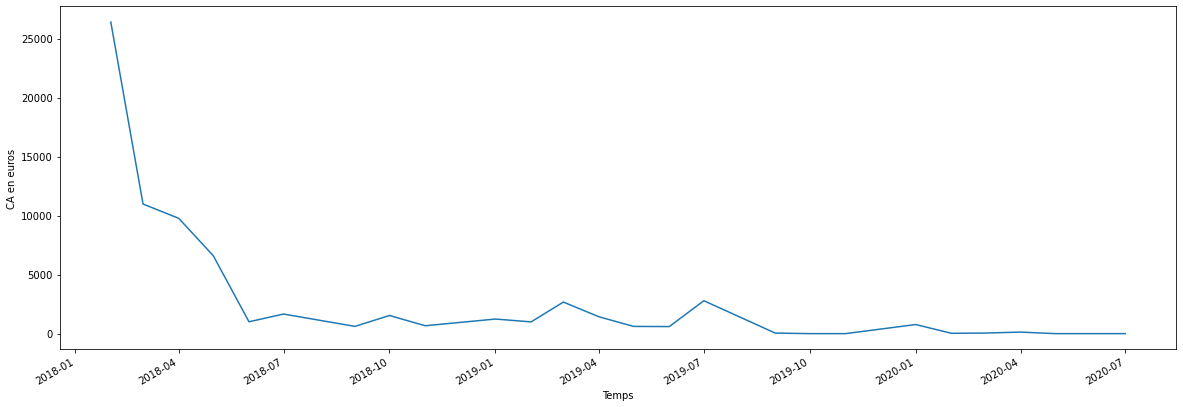

In [16]:
# Filtrer les colonnes nécessaires 
analyse_supp_1 = new_web_liaison_erp.loc[:, ('total_sales', 'price', 'post_date', 'onsale_web', 'stock_quantity', 'stock_status')]
analyse_supp_1['CA'] = analyse_supp_1['total_sales']*analyse_supp_1['price']

# Changer le format datetime 'post_date' (au format année-mois)
analyse_supp_1['post_date']=pd.to_datetime(analyse_supp_1['post_date'].dt.strftime('%Y-%m'))
#display(analyse_supp_1)

# Représenter l'evolution de CA par graphique
evolution_CA = analyse_supp_1.groupby(by=['post_date']).sum('[CA]')
evolution_CA['proportion de CA'] = round((evolution_CA['CA']*100/CA_total), 2)
#display(evolution_CA)
display(evolution_CA[['CA', 'proportion de CA']].style.background_gradient(axis=0))

evolution_CA['CA'].plot(xlabel="Temps", ylabel="CA en euros", figsize=(20, 7))
print(f"Evolution de CA au cours du temps (de 02-2018 à 07-2020)")

<p style="text-align:center"><b >Observation</b></p>

* En générale, le CA a la tendance à diminuer de 02/2018 à 07/2020
* Il y a des périodes où le CA est anormal (CA est égale à 0)
* Je vais noter cette observation dans les remarques de la conclusion à la fin du document pour qu'on puisse les analyser plus tard

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"> <br>Mission 3 <br> <br>Analyse du prix des produits<br> </h2>

<h3><b><u>Etapes d'analyse du prix des produits:</u></b></h3>

* La vérification des valeurs aberrantes dans une base de données a pour l'objectif de les identifier et puis soit on les supprime, soit on les conserve, ou soit on les corrige
* Pour cela, je commence par l'observation des valeurs maximale, minimale, la moyenne et la médiane des prix du vin
* Ensuite, je représente les prix sous forme des diagrammes en histogramme et en boîte à mouches pour évaluer sa dispersion
* Enfin, je vais traiter les valeurs abberrantes en utilisant les 2 méthodes : STD (mesure de la distribution des valeurs autour de la moyenne si la distribution suit la loi normale) et IRQ (interquartile range)(mesure de la distribution des valeurs autour de la mediane)

<h4> 1. Observation des valeurs maximale, minimale, la moyenne et la médiane des prix du vin </h4>

In [17]:
display(erp[['price']].describe())

max_prix = erp['price'].max()
min_prix = erp['price'].min()
moyenne_prix = erp['price'].mean()
mediane_prix = erp['price'].median()
print(f"Le vin plus cher est vendu au prix de {max_prix} euros")
print(f"Le vin moins cher est vendu au prix de {min_prix} euro")
print(f"La moyenne des prix est égale à {moyenne_prix:.2f} euros")
print(f"La médiane des prix est égale à {mediane_prix:.2f} euros")
#erp.sort_values(by = 'price', ascending = False)

,price
count,825.000000
mean,32.415636
std,26.795849
min,5.200000
25%,14.600000
50%,24.400000
75%,42.000000
max,225.000000


Le vin plus cher est vendu au prix de 225.0 euros
Le vin moins cher est vendu au prix de 5.2 euro
La moyenne des prix est égale à 32.42 euros
La médiane des prix est égale à 24.40 euros


<h4> 2. Représentation en histogramme et en boîte à moustaches des prix du vin </h4>

Comparaison des données brutes par la représentation en histogramme


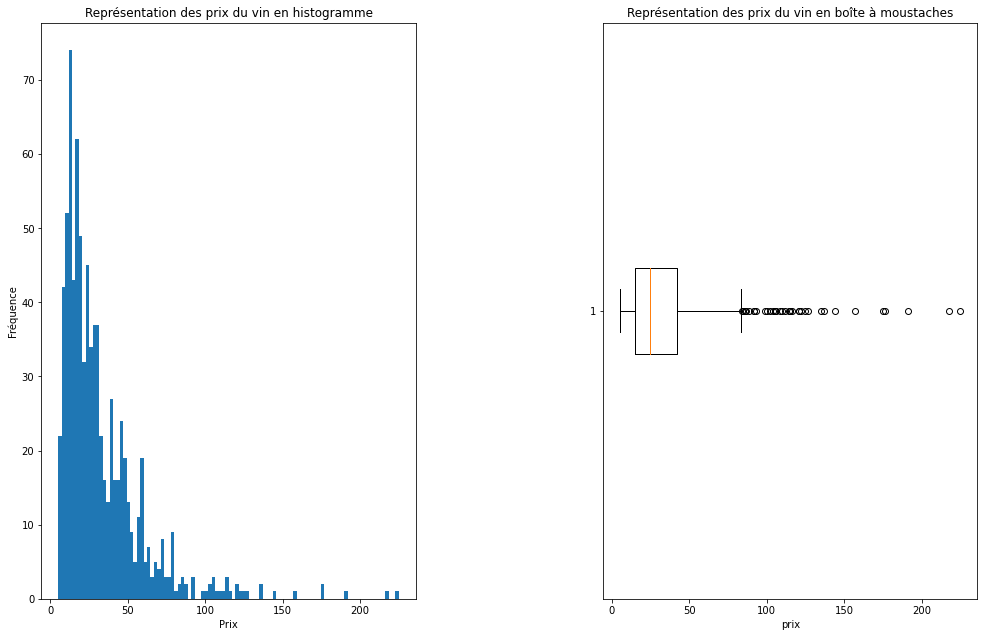

La distribution des valeurs (en histogramme) ressemble beaucoup à la distribution gaussienne.La représentation des prix est asymétriques ou il existe des valeurs aberrantes à traiter.Plus précisément, elles sont situées éloignées à droites de ces 2 graphiques et suppérieures à 100 euros


In [18]:
print(f"Comparaison des données brutes par la représentation en histogramme")
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 5) # wspace : joue sur la marge horizontale qui sépare les graphiques

# Représentation des prix du vin en histogramme
axes = figure.add_subplot(1, 2, 1)
plt.hist(erp['price'], bins=100)
plt.title("Représentation des prix du vin en histogramme")
plt.xlabel('Prix')
plt.ylabel('Fréquence')

# Représentation des prix du vin en boîte à moustaches
axes = figure.add_subplot(1, 2, 2)
plt.boxplot(erp['price'], vert=False)
plt.title("Représentation des prix du vin en boîte à moustaches")
plt.xlabel('prix')
plt.show()

print(f"La distribution des valeurs (en histogramme) ressemble beaucoup à la distribution gaussienne.\
La représentation des prix est asymétriques ou il existe des valeurs aberrantes à traiter.\
Plus précisément, elles sont situées éloignées à droites de ces 2 graphiques et suppérieures à 100 euros")

<p style="text-align:center"><b >Observation</b></p>

* La plupart des vins ont le prix entre 14,6 euros (25%) à 42 euros (75%)
* Cependant, on peut voir également les prix aberrants. Les premières observations montrent que ces valeurs sont réparties à droite des 2 diagrammes ou elles sont les prix en extrême grandes (suppérieures à 100 eruos?)
* Afin d'analyser ces valeurs aberrantes, j'utilise 2 méthodes cités au-dessus. Les résultats issues de ces 2 méthodes seront comparées et analysées

<h4> 4. Méthode STD (standard deviation) </h4>

* J'utilise la méthode STD pour chercher les valeurs aberrantes en sachant que cette distribution est gaussienne
* Pour cette analyse, je prends une limite de 2STD  ou 5% des valeurs qui se trouvent à l'extérieur de l'écart-type de la moyenne seront considérées comme les valeurs aberrantes.

In [19]:
print(f"Traitement des valeurs aberrantes en utilisant l'écart-type ou la dispersion des prix autour de la moyenne :")

# Déterminer les limites des valeurs
std_erp_prix = erp['price'].std()
limit_std = 2*std_erp_prix
lower_std = moyenne_prix - limit_std # limite inférieure
upper_std = moyenne_prix + limit_std # limite supérieure
prix_aberrants_std = [x for x in erp['price'] if x < lower_std or x > upper_std]

# Identifier et calculer le nombre de valeurs aberrantes
#display(prix_aberrants_std)
print(f"Nombre de valeurs aberrantes : {len(prix_aberrants_std)}")

# Eliminer les valeurs aberrantes
prix_new_std = [x for x in erp['price'] if x >= lower_std and x <= upper_std]
#display(prix_new_std)
print(f"Nombre de valeurs non-aberrantes: {len(prix_new_std)}")

# Tranformer les données aberrantes en df
prix_aberrants_std = pd.to_numeric(prix_aberrants_std, errors='coerce')
prix_aberrants_std = pd.DataFrame(prix_aberrants_std,columns=['price'])
prix_aberrants_std
display(prix_aberrants_std['price'].sort_values(ascending=False).to_frame())

print(f"Les valeurs aberrantes se trouvent entre 86,1 euros et 225 euros")

Traitement des valeurs aberrantes en utilisant l'écart-type ou la dispersion des prix autour de la moyenne :
Nombre de valeurs aberrantes : 34
Nombre de valeurs non-aberrantes: 791


,price
3,225.0
13,217.5
21,191.3
5,176.0
20,175.0
7,157.0
10,144.0
12,137.0
25,135.0
4,126.5


Les valeurs aberrantes se trouvent entre 86,1 euros et 225 euros


In [20]:
# Tranformer les données éburées en df
prix_new_std = pd.to_numeric(prix_new_std, errors='coerce')
prix_new_std = pd.DataFrame(prix_new_std,columns=['price'])
prix_new_std

,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0
...,...
786,45.0
787,45.0
788,54.8
789,26.5


<h4> 5. Méthode IQR (interquartile range) </h4>

In [21]:
print(f"Traitement des valeurs aberrantes en utilisant les quantiles")
q25 = np.percentile(erp['price'], 25)
q75 = np.percentile(erp['price'], 75)
iqr = q75 - q25

# Déterminer les quantiles 25% et 75%
limit_iqr = 1.5*iqr
lower_iqr = q25 - limit_iqr
upper_iqr = q75 + limit_iqr

# Identifier et calculer le nombre de valeurs aberrantes
prix_aberrants_iqr = [x for x in erp['price'] if x < lower_iqr or x > upper_iqr]
#display(prix_aberrants_iqr)
print(f"Nombre de valeurs aberrantes (iqr) : {len(prix_aberrants_iqr)}")

# Eliminer les valeurs aberrantes
prix_new_iqr = [x for x in erp['price'] if x >= lower_iqr and x <= upper_iqr]
print(f"Nombre de valeurs non-aberrantes (iqr) : {len(prix_new_iqr)}")
#display(prix_new_iqr)

# Tranformer les données aberrantes en df
prix_aberrants_iqr = pd.to_numeric(prix_aberrants_iqr, errors='coerce')
prix_aberrants_iqr = pd.DataFrame(prix_aberrants_iqr,columns=['price'])
display(prix_aberrants_iqr['price'].sort_values(ascending=False).to_frame())
print(f"Les valeurs aberrantes se trouvent entre 83,7 euros et 225 euros")

Traitement des valeurs aberrantes en utilisant les quantiles
Nombre de valeurs aberrantes (iqr) : 37
Nombre de valeurs non-aberrantes (iqr) : 788


,price
3,225.0
14,217.5
24,191.3
6,176.0
23,175.0
8,157.0
11,144.0
13,137.0
28,135.0
4,126.5


Les valeurs aberrantes se trouvent entre 83,7 euros et 225 euros


In [22]:
# Tranformer les données éburées en df
prix_new_iqr = pd.to_numeric(prix_new_iqr, errors='coerce')
prix_new_iqr = pd.DataFrame(prix_new_iqr,columns=['price'])
prix_new_iqr

,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0
...,...
783,45.0
784,45.0
785,54.8
786,26.5


<h4> 6. Comparaison les résultats issues des 2 analyses valeurs abérrantes </h4>

In [23]:
print(f"Description de données épurées en utilisant la méthode STD")
display(prix_new_std.describe())
print(f"Description de données épurées en utilisant la méthode IQR")
display(prix_new_iqr.describe())
print(f"Les résultats obtenus des 2 différentes méthodes sont similaires. \
La valeur centrale du vin est égale à 23,5 euros et proche à la valeur moyenne, qui est environ à 28 euros")

Description de données épurées en utilisant la méthode STD


,price
count,791.000000
mean,28.470417
std,17.831194
min,5.200000
25%,14.300000
50%,23.500000
75%,39.150000
max,85.600000


Description de données épurées en utilisant la méthode IQR


,price
count,788.000000
mean,28.256472
std,17.523618
min,5.200000
25%,14.275000
50%,23.400000
75%,39.000000
max,83.000000


Les résultats obtenus des 2 différentes méthodes sont similaires. La valeur centrale du vin est égale à 23,5 euros et proche à la valeur moyenne, qui est environ à 28 euros


Comparaison des données épurées par la représentation en histogramme


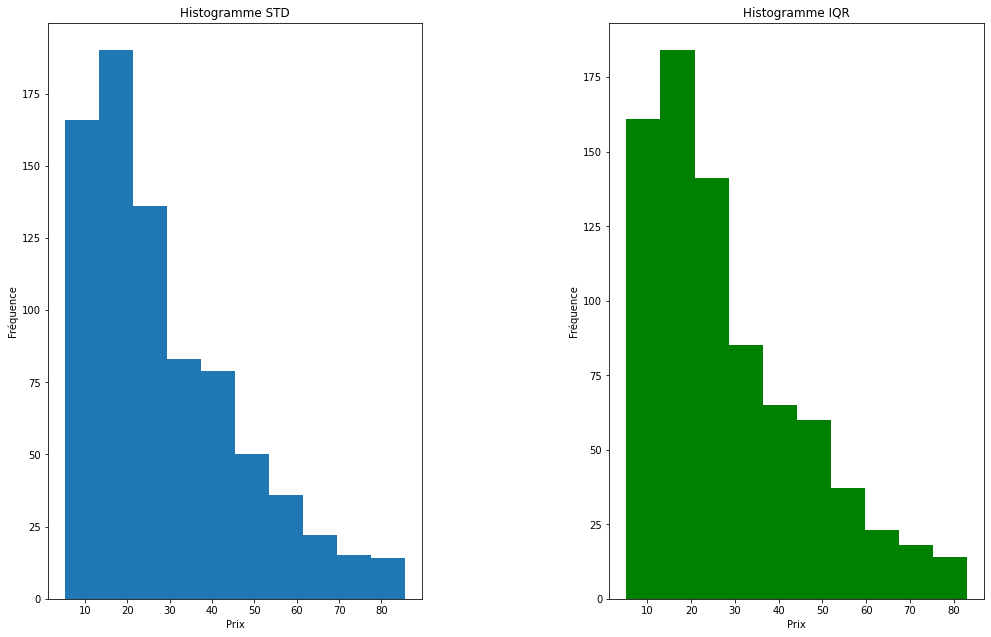

In [24]:
print(f"Comparaison des données épurées par la représentation en histogramme")
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 5) # wspace : joue sur la marge horizontale qui sépare les graphiques

# Histogramme de l'analyse STD
axes = figure.add_subplot(1, 2, 1)
plt.hist(prix_new_std['price'])
plt.title("Histogramme STD")
plt.xlabel('Prix')
plt.ylabel('Fréquence')

# Histogramme de l'analyse IQR
axes = figure.add_subplot(1, 2, 2)
plt.hist(prix_new_iqr['price'], color = ['green'])
plt.title("Histogramme IQR")
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


Comparaison des données épurées par la représentation en boîte à moutaches


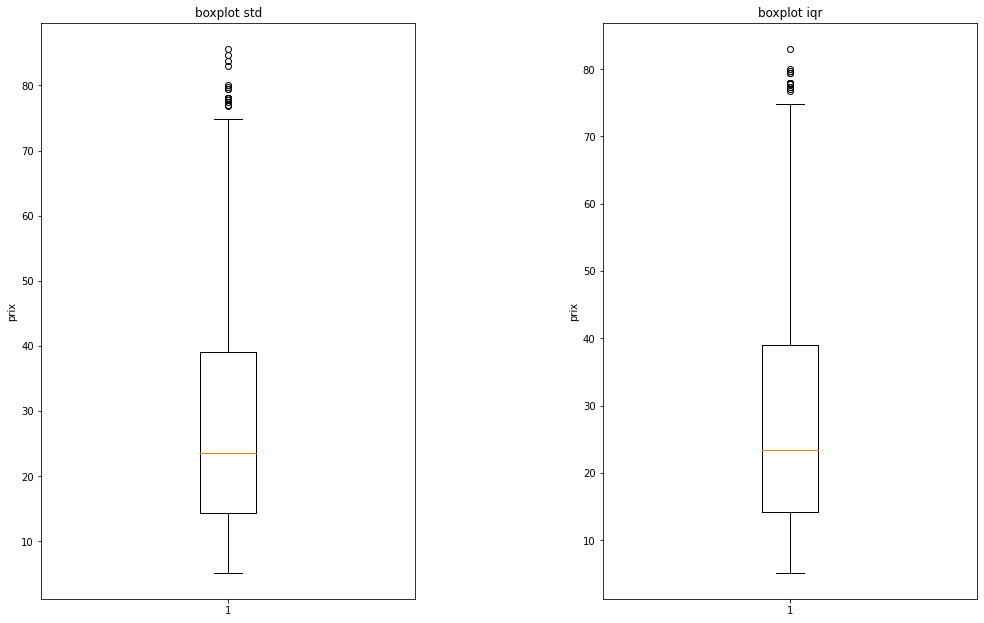

In [25]:
print(f"Comparaison des données épurées par la représentation en boîte à moutaches")
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 2) # wspace : joue sur la marge horizontale qui sépare les graphiques

# Boîte à moustaches des analyse de STD
axes = figure.add_subplot(1, 2, 1)
plt.boxplot(prix_new_std['price'])
plt.title("boxplot std")
plt.ylabel('prix')

# Boîte à moustaches des analyse de IQR
axes = figure.add_subplot(1, 2, 2)
plt.boxplot(prix_new_iqr['price'])
plt.title("boxplot iqr")
plt.ylabel('prix')
plt.show()

La représentation en histogramme et en boîte à moutaches des 2 méthodes d'analyser de valeurs aberrantes est similaire.
Donc, on peut conclure que nos données sont épurées.

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:verdana; border:2px solid LightSteelBlue"><br>Conclusion<br></h1>

<b><u>Conclusion des analyses </u>:</b>
    
  <ul>
      <li>L'export de la table de l’outil de CMS (fichier 'web') contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...) n'est pas complet. Plus précisément, en examinant les lignes vides de ce fichier, je trouve qu'il y a 2 produits qui n'ont pas d'identifiant sur le web (fichier 'web_null').</li>
      <li>Les analyses du chiffre d'affaires montrent aussi des anomalies car le chiffre d'affaire est égal à 0 dans la plupart des mois entre 02/2018 et 07/2020 et crée une chute très importante de chiffre d'affaires des produits vendus (ou faux résultat) sur le site internet.</li>
  </ul>
    
<b><u>Optimisation de la gestion de données </u>:</b>
    
  <ul>
      <li>Suite aux observations précécentes, une mise à jours ou une vérification du système de gestion de de contenu (CMS) sera nécessaire pour avoir les résultats de la vente en ligne corrects et complets, notamment les identifiants des produits mises en vente.</li>
      <li>Ensuite, une synchronisation de toutes les informations des 2 base données de web et erp en utilisant un référentiel commun des produits de l'entreprise (ex: une table correspondante) est fortement conseillée. Le but de cette action est de créer des données de la gestion de stock et de vente plus cohérentes et de faciliter à analyser. A noter que toutes les données de CMS, ERP avant cette synchronisation ainsi que celles du fichier 'liaison' doivent être sauvegardées pour éviter la perte des données de la vente.</li>
  </ul>